# Проект: прогнозирование успеха игр - анализ трендов

**В проекте пердставлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.**

**Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

### Цели проекта:

1. **Провести анализ продаж игр.**
2. **Составить портрет пользователя из каждого региона (NA, EU, JP).**
3. **Проверить гипотезы.**

### Задачи проекта:

#### [Провести исследовательский анализ продаж игр:](#EDA)
- **Определить, сколько игр выпускалось в разные годы.**
- **Определить распределение платформ с наибольшими суммарными продажами по годам.**
- **Определить, какой характерный срок появляются новые и исчезают старые платформы.**
- **Определить актуальный период наблюдений.**
- **Определить потенциально прибыльные платформы.**
- **Исследовать глобальные продажи игр в разбивке по платформам.**
- **Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**
- **Изучить продажи на менее популярных платформах.**
- **Изучить общее распределение игр по жанрам.**

#### [Составить портрет пользователя каждого региона:](#portrait)
- **Определить для пользователя каждого региона (NA, EU, JP):**
    - **Самые популярные платформы (топ-5)**
    - **Самые популярные жанры (топ-5).**
    - **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**
    - **Составить портреты пользователей каждого региона.**

#### [Проверить гипотезы:](#hypothesis)
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **Средние пользовательские рейтинги жанров Action и Sports разные.**

### Описание данных

- **Name** — название игры.
- **Platform** — платформа, на которой выпущена игра (например, PlayStation, Xbox, PC и т.д.).
- **Year_of_Release** — год выпуска игры.
- **Genre** — жанр игры (например, Action, Adventure, Sports и т.д.).
- **NA_sales** — продажи в Северной Америке (в миллионах проданных копий).
- **EU_sales** — продажи в Европе (в миллионах проданных копий).
- **JP_sales** — продажи в Японии (в миллионах проданных копий).
- **Other_sales** — продажи в других странах (в миллионах проданных копий).
- **Critic_Score** — оценка критиков (максимальное значение — 100).
- **User_Score** — оценка пользователей (максимальное значение — 10).
- **Rating** — рейтинг от организации ESRB (Entertainment Software Rating Board). (Возрастная категория в зависимости от рейтинга).

In [1]:
# создадим словарь соответствий наименований столбцов их описанию
data_description = {
    'name': 'Название игры',
    'platform': 'Платформа',
    'year_of_release': 'Год выпуска игры',
    'genre': 'Жанр',
    'na_sales': 'Продажи в Северной Америке',
    'eu_sales': 'Продажи в Европе',
    'jp_sales': 'Продажи в Японии',
    'other_sales': 'Продажи в других странах',
    'critic_score': 'Оценка критиков',
    'user_score': 'Оценка пользователей',
    'rating': 'Рейтинг ESRB'
}

<a id="download"></a>
## Загрузка данных

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from scipy import stats as st

In [3]:
# задаем настройки среды визуализации
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

sns.set(style="darkgrid", font_scale=1, rc={"figure.figsize": (10, 6)})

In [4]:
!pip freeze > requirements.txt 

In [5]:
# загружаем датасет
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv(r"C:\Users\User\da_practicum\local_projects\datasets\games.csv")

In [6]:
# выводим общую информация
display(games.info())
display(games.head(10))
display(games.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


***В датафрейме представлены данные с 1980 по 2016 годы.***

***Столбцы Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating имеют пропуски. Необходима дальнейшая обработка.***

***Столбец Year_of_Release хранит год выпуска игры, но имеет тип float64***

<a id="preprocessing"></a>
## Предобработка данных

### Замена названий столбцов

- **Приведем названия столбцов к общему виду.**

In [7]:
games.columns = games.columns.str.lower()

In [8]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных

- **Поменяем тип данных столбца *year_of_release* на Int64, т.к. год выпуска - целочисленное значение**
- **Поменяем тип данных столбца *rating* на category, т.к. этот столбец имеет конечное относительно небольшое число возможных значений. Так же замена типа на категориальный позволяет сократить использование памяти в объемных датафреймах.**

In [9]:
# скопируем датафрейм
games_opt = games.copy()

In [10]:
# определим словарь для сопоставления столбцов и типов данных
col_type = {
    'year_of_release': 'Int64',
    'rating': 'category'
}
# меняем типы
for col, dt_type in col_type.items():
        games_opt[col] =  games_opt[col].astype(dt_type)

### Обработка пропусков

#### Функция для отображения пропусков.

In [11]:
def table_passes(df):
    '''
    Функция отображает количество пропусков
    '''
    df = pd.DataFrame({
            'Кол-во пропусков': df.isna().sum(),
            'Процент пропусков': round(df.isna().mean() * 100, 2)
            }).sort_values(by='Процент пропусков', ascending=False)
    return df.query('`Кол-во пропусков` > 0')

#### Подсчет количества пропусков.

- **Посчитаем количество пропусков**

In [12]:
# посчитаем и выведем в таблицу количество пропусков и их процент. Таблицу отсортируем
table_passes(games_opt)

,Кол-во пропусков,Процент пропусков
critic_score,8578,51.32
rating,6766,40.48
user_score,6701,40.09
year_of_release,269,1.61
name,2,0.01
genre,2,0.01


***В столбцах critic_score, rating процент пропусков 51% и 40.5% соответственно. В этом случае заполнение пропусков средним или медианным значением сильно исказит статистические свойства.***

***Есть возможность заполнить пропуски, например с помощью метода стохастической линейной регрессии. Но в данном проекте такое заполнение не будем рассматривать. Оставим пропуски как есть.***

- **В столбце *user_score* присутствует строковое значение "tbd".** 

In [13]:
games_opt.query('user_score == "tbd"')['user_score'].count()

2424

- **2424 значений "tbd" заменим на None.**

In [14]:
games_opt.loc[games_opt['user_score'] == "tbd", 'user_score'] = None
# после замены tbd на None
table_passes(games_opt)

,Кол-во пропусков,Процент пропусков
user_score,9125,54.59
critic_score,8578,51.32
rating,6766,40.48
year_of_release,269,1.61
name,2,0.01
genre,2,0.01


***В столбце user_score процент пропусков 54.5%. В этом случае заполнение пропусков средним или медианным значением сильно исказит статистические свойства.***

***Так же присутствуют пропуски в столбцах name, и genre, далее покажем, что они находятся вне актуального периода.***

***Пропуски в столбце year_of_release оставим как есть. От общего количества они составляют 1.6%, а заполнять их вручную для каждой игры нецелесообразно для данной работы.***

***Пропуски в данных могли возникнуть, потому что в ранние периоды наблюдений не собирались данные по оценкам критиков и пользователей, по рейтингу. Возможно в то время не было такой системы рейтинга. Так же оценки могут отсутствовать у непопулярных игр, или у игр, которые только вышли, и не успели собрать оценки.***

- **Изменим тип данных столбца user_score на float64.**

In [15]:
games_opt['user_score'] = games_opt['user_score'].astype('float64')

#### Суммарные продажи во всех регионах

- **Определим суммарные продажи во всех регионах. Добавим соответствующий столбец в датафрейм.**

In [16]:
games_opt['all_sales'] = games_opt[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# добавляем значение и описание в словарь
data_description['all_sales'] = 'Суммарные продажи'

games_opt.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Проверка "неявных" дубликатов

- **Проверим дубликаты в столбцах name, platform, genre.**

In [17]:
print('Количество дубликатов', games_opt.duplicated(subset=['name', 'platform', 'genre']).sum())

# покажем дубликаты
display(games_opt
      .loc[games_opt.duplicated(subset=['name', 'platform', 'genre'],
                                keep=False),
           ['name', 'platform', 'genre']])

Количество дубликатов 5


,name,platform,genre
604,Madden NFL 13,PS3,Sports
659,NaN,GEN,NaN
1190,Need for Speed: Most Wanted,X360,Racing
1591,Need for Speed: Most Wanted,X360,Racing
1745,Sonic the Hedgehog,PS3,Platform
4127,Sonic the Hedgehog,PS3,Platform
5972,Need for Speed: Most Wanted,PC,Racing
11715,Need for Speed: Most Wanted,PC,Racing
14244,NaN,GEN,NaN
16230,Madden NFL 13,PS3,Sports


- **Присутствует 5 дубликатов. Удалим их.**

In [18]:
games_opt = games_opt.drop_duplicates(subset=['name', 'platform', 'genre'])

<a id="EDA"></a>
## Исследовательский анализ данных

- **Определим функцию для добавления заголовка.**

In [19]:
def show_title(title, x_label, y_label, rot=False, file_name=None):
    '''
    Функция добавляет заголовок, подписи осей, вращение подписей осей.
    '''
    
    # задаем название графика, названия осей
    plt.title(title)
    
    if data_description.get(x_label):
        ax.set_xlabel(data_description.get(x_label))
    else:
        ax.set_xlabel(x_label)

    if data_description.get(y_label):
        ax.set_ylabel(data_description.get(y_label))
    else:
        ax.set_ylabel(y_label)
    
    # поворот названий осей
    if rot:
        plt.xticks(rotation=45)
    # сохраним картинку
    if file_name:
        plt.savefig(file_name)
    plt.show()

### Выпуск игр в разные годы

- **Покажем, сколько игр выпускалось в разные годы**

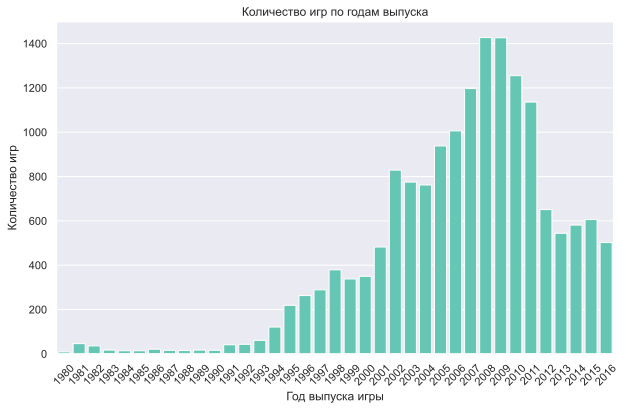

In [20]:
# построим график количества игр по годам
ax = sns.barplot(x=games_opt['year_of_release'].value_counts().sort_index().index,
                 y=games_opt['year_of_release'].value_counts().sort_index().values, 
                 color='#55D6BE')
    
#именуем таблицу и оси
show_title(title='Количество игр по годам выпуска',
           x_label='year_of_release',
           y_label='Количество игр',
           rot=True,
           file_name='1_3_1')

***По графику видно, что наибольшее количество игр было выпущено в 2008-2009 годах.***

***Видно, что в период с 1980 по 1993 годы, количество игр было кратно меньше, чем в с 2002 по 2016***

### Изменение продаж по платформам

- **Покажем, как менялись продажи по платформам.**
- **Выберем платформы с наибольшими суммарными продажами.**
- **Построим распределение по годам.**

In [21]:
# определяем платформы с наибольшими суммарными продажами
games_opt_top_platform = (games_opt
                          .pivot_table(index=['platform'], values=['all_sales'], aggfunc='sum')
                          .query('all_sales > 300') #вибираем платформы, у кот. суммарные продажи более 300 млн.
                          .sort_values('all_sales', ascending=False)
                         )
games_opt_top_platform

,all_sales
platform,
PS2,1255.77
X360,970.17
PS3,939.16
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14


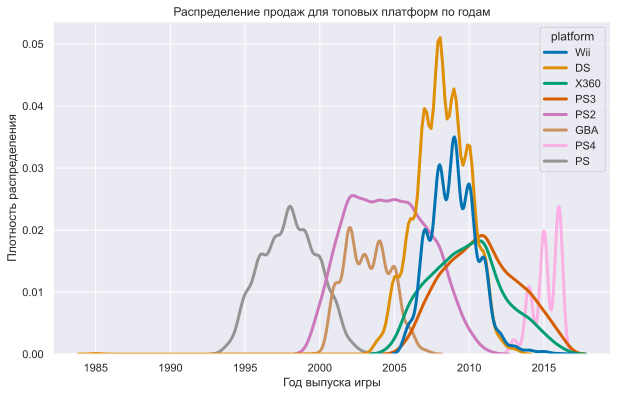

In [22]:
games_opt['year_of_release'] = games_opt['year_of_release'].astype(float)
#строим график распределения для платформ с наибольшими продажами по годам
ax = sns.kdeplot(data=games_opt.query('platform in @games_opt_top_platform.index'), 
                 x='year_of_release',
                 hue='platform',
                 linewidth=3,
                 palette="colorblind"
                )

#именуем таблицу и оси
show_title(title='Распределение продаж для топовых платформ по годам',
           x_label='year_of_release',
           y_label='Плотность распределения')

***На графике распределения видно, что срок жизни платформы составляет примерно 10 лет. Следующее поколение платформы (РS, PS2, PS3) появляется примерно через 5 - 6 лет после выхода предыдущего.***

- **У платформы DS наблюдается выброс в районе 1985 года. Хотя платформа выпущена в 2004 году.**
- **Удалим все данные, до 2004 года для этой платформы.**

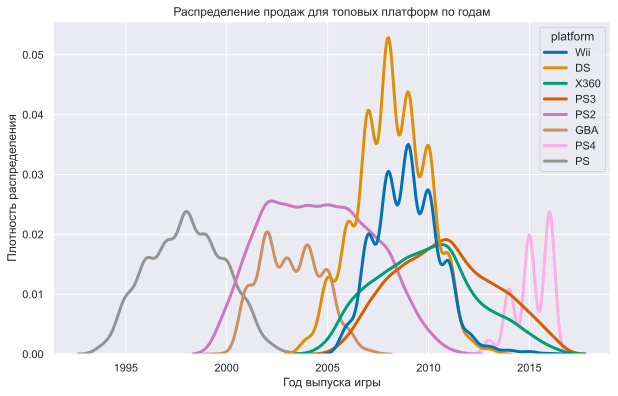

In [23]:
# Удалим все данные, до 2004 года для DS
games_opt = games_opt[~((games_opt['platform'] == 'DS') & (games_opt['year_of_release'] < 2004))]
                        
# снова строим график распределения для платформ с наибольшими продажами по годам
ax = sns.kdeplot(data=games_opt.query('platform in @games_opt_top_platform.index'), 
                 x='year_of_release',
                 hue='platform',
                 linewidth=3,
                 palette="colorblind"
                )

#именуем таблицу и оси
show_title(title='Распределение продаж для топовых платформ по годам',
           x_label='year_of_release',
           y_label='Плотность распределения',
           file_name='1_3_2')

***Выброс удален. Время жизни платформ можно оценить от 7 до 12 лет.***

### Выбор актуального периода

***Для построения прогноза на 2017 год необходимо выбрать актуальный период наблюдений. Предыдущий анализ показал, что смена поколений платформ происходит примерно каждые 5-6 лет. Соответственно, примем за актуальный период с 2011 по 2016 гг.***

- **Сохраним новый датафрейм с актуальными данными**

In [24]:
games_act = games_opt.query('year_of_release > 2010').reset_index().copy()
games_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index            4020 non-null   int64   
 1   name             4020 non-null   object  
 2   platform         4020 non-null   object  
 3   year_of_release  4020 non-null   float64 
 4   genre            4020 non-null   object  
 5   na_sales         4020 non-null   float64 
 6   eu_sales         4020 non-null   float64 
 7   jp_sales         4020 non-null   float64 
 8   other_sales      4020 non-null   float64 
 9   critic_score     1810 non-null   float64 
 10  user_score       2030 non-null   float64 
 11  rating           2312 non-null   category
 12  all_sales        4020 non-null   float64 
dtypes: category(1), float64(8), int64(1), object(3)
memory usage: 381.3+ KB


- **Изучим пропуски в данных.**

In [25]:
table_passes(games_act)

,Кол-во пропусков,Процент пропусков
critic_score,2210,54.98
user_score,1990,49.50
rating,1708,42.49


***Для актуального периода процент пропусков в столбцах *critic_score, user_score, rating* практически не изменились относительно наблюдений за весь период с 1980 года.***

***В столбцах name и genre пропусков нет.***

### Потенциально прибыльные платформы

- **Изучим продажи по платформам. Выберем потенциально более прибыльные.**

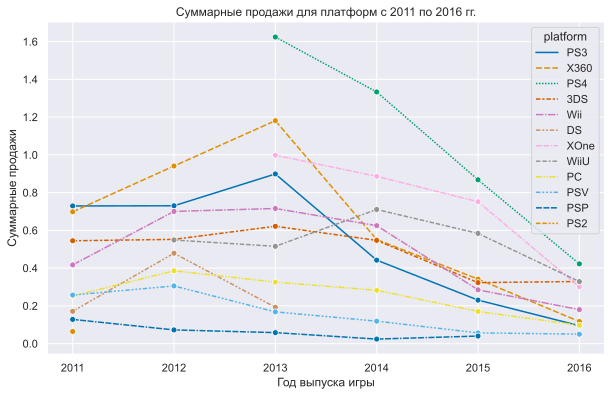

In [26]:
ax = sns.lineplot(data=games_act,
                  x='year_of_release',
                  y='all_sales',
                  hue='platform',
                  style='platform',
                  marker='o',
                  palette="colorblind",
                  ci=None)

#именуем таблицу и оси
show_title(title='Суммарные продажи для платформ с 2011 по 2016 гг.',
           x_label='year_of_release',
           y_label='Суммарные продажи',
           file_name='1_3_4')

***Восходящий тренд наблюдается у платформ PSV и 3DS. У остальных - наблюдается снижение продаж. Но платформы XOne и PS4 достаточно молодые (появились в 2013 году). Потенциально их продажи могут вырасти.*** 

### Глобальные продажи игр в разбивке по платформам

- **Построим диаграмму размаха продаж для платформ с 2011 по 2016 гг.**

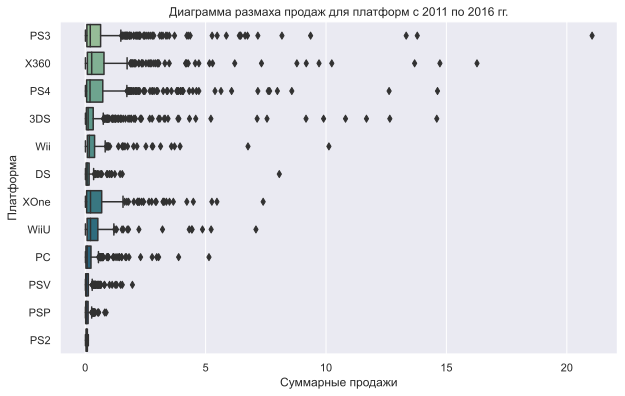

In [27]:
ax = sns.boxplot(data=games_act,
                 x='all_sales',
                 y='platform',
                 palette="crest",
                 dodge=False)

#именуем таблицу и оси
show_title(title='Диаграмма размаха продаж для платформ с 2011 по 2016 гг.',
           x_label='all_sales',
           y_label='platform')

***Наблюдаем нессиметричные распределения (с длинными правыми "усами"). Присутствуют выбросы почти для каждой платформы.***

- **Увеличим масштаб.**

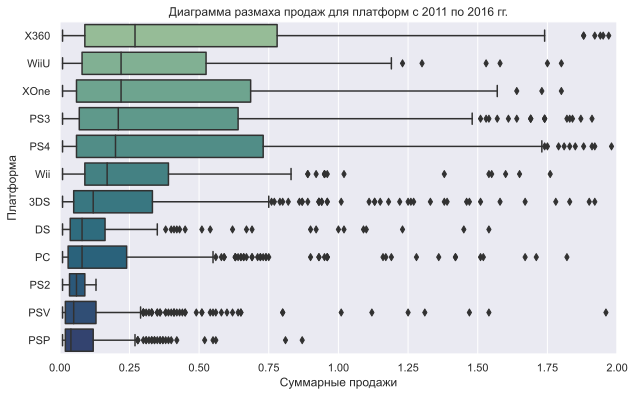

In [28]:
# сортировка от большего к меньшему
order = games_act.groupby('platform')['all_sales'].median().sort_values(ascending=False).index

#строим график
ax = sns.boxplot(data=games_act,
                 x='all_sales',
                 y='platform',
                 order=order,
                 width=.8,
                 palette="crest",
                 dodge=False)

plt.xlim(0, 2)

#именуем таблицу и оси
show_title(title='Диаграмма размаха продаж для платформ с 2011 по 2016 гг.',
           x_label='all_sales',
           y_label='platform',
           file_name='1_3_5')

***Основные продажи для всех платформ расположены до 0.75 млн. проданных копий игр. По медиане у Х360 продажи больше остальных платформ.***

### Влияние отзывов критиков и пользователей на продажи.

- **Для исследования выберем одну популярную платформу - X360.**

- **Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

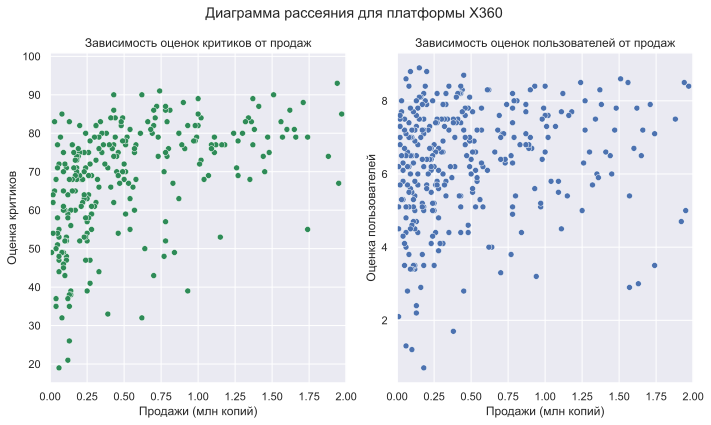

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
# задаем левый график
sns.scatterplot(data=games_act.query('platform == "X360"'),
                 x='all_sales',
                 y='critic_score',
                 color='seagreen',
                 ax=ax1)
# задаем правый график
sns.scatterplot(data=games_act.query('platform == "X360"'),
                 x='all_sales',
                 y='user_score',
                 palette="crest",
                 ax=ax2)

ax1.set_xlim(0, 2)
#подпись на графике
ax1.set_xlabel('Продажи (млн копий)')  
ax1.set_ylabel('Оценка критиков')
ax1.set_title('Зависимость оценок критиков от продаж')

ax2.set_xlim(0, 2)
#подпись на графике
ax2.set_xlabel('Продажи (млн копий)')
ax2.set_ylabel('Оценка пользователей')
ax2.set_title('Зависимость оценок пользователей от продаж') 

fig.suptitle('Диаграмма рассеяния для платформы Х360')
plt.tight_layout()
plt.show()

- **Определим корреляцию между отзывами и продажами. Построим heatmap.**

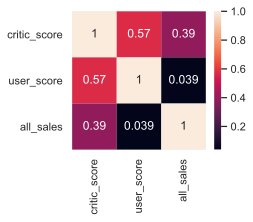

In [30]:
plt.figure(figsize=(3, 2.5))
ax = sns.heatmap(games_act.query('platform == "X360"')[['critic_score', 'user_score', 'all_sales']].corr(),
                 annot=True)

***Между отзывами критиков и всеми продажами корреляция крайне слабая (0.39). Между отзывами пользователей и всеми продажами корреляция отсутствует (0.039).***

- **Исследуем продажи на других платформах.**
- **Построим диаграмму рассеяния.**

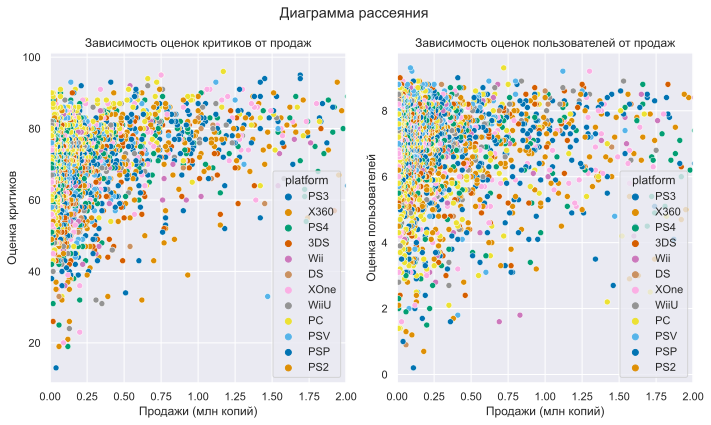

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
# задаем левый график
sns.scatterplot(data=games_act,
                x='all_sales',
                y='critic_score',
                palette="colorblind",
                hue='platform',
                ax=ax1)

# задаем правый график
sns.scatterplot(data=games_act,
                x='all_sales',
                y='user_score',
                palette="colorblind",
                hue='platform',
                ax=ax2)

ax1.set_xlim(0, 2)
#подпись на графике
ax1.set_xlabel('Продажи (млн копий)')  
ax1.set_ylabel('Оценка критиков')
ax1.set_title('Зависимость оценок критиков от продаж')

ax2.set_xlim(0, 2)
#подпись на графике
ax2.set_xlabel('Продажи (млн копий)')
ax2.set_ylabel('Оценка пользователей')
ax2.set_title('Зависимость оценок пользователей от продаж')

fig.suptitle('Диаграмма рассеяния')
plt.tight_layout()
plt.show()

- **Определим корреляцию для каждой платформы.** 

In [32]:
games_act.pivot_table(index='platform', values=['critic_score', 'user_score', 'all_sales'], aggfunc='corr')\
                 .unstack()\
                 .loc[:, 'all_sales']\
                 .loc[:, ['critic_score', 'user_score']]\
                 .sort_values('critic_score')

,critic_score,user_score
platform,,
PSV,0.131763,0.013489
DS,0.261166,0.281029
Wii,0.292269,0.145504
PC,0.315416,-0.047500
WiiU,0.348380,0.400219
3DS,0.348740,0.222078
PSP,0.358138,0.010035
PS3,0.381991,0.013221
X360,0.391253,0.038918


- ***Для большинства платформ сохраняется тенденция, что коэффициент корреляции между всеми продажами и оценкой критиков на порядок больше коэффициента корреляции между всеми продажами и оценкой пользователей.***
- ***Наибольшая корреляция у XOne.***
- ***Для PS2 нет данных по оценке критиков.***
- ***В целом, можно заключить, оценка критиков оказывает слабое влияние на общие продажи.***

### Распределение игр по жанрам.

- **Определим функцию, которая добавляет количественные значения в barplot.**

In [33]:
# определим функцию, которая добавляет количественные значения в barplot
def nums(df, axes, percentage=None):
    for p in axes.patches:
        
        #абсолютное значение
        axes.text(p.get_x() + p.get_width() / 2, p.get_height() / 2, f'{int(p.get_height())}', 
                ha='center', va='top', fontsize=12, color='white')
        #вычисляем процент
        if percentage:
            percentage = f'{(p.get_height() / len(df) * 100):.1f}%'
            #процентное значение
            axes.text(p.get_x() + p.get_width() / 2, p.get_height() / 4, percentage, 
                    ha='center', va='top', fontsize=10, color='white')

- **Изучим, как распределены игры по жанрам.**
- **Выделяются ли жанры с высокими и низкими продажами.**
- **Построим графики.**

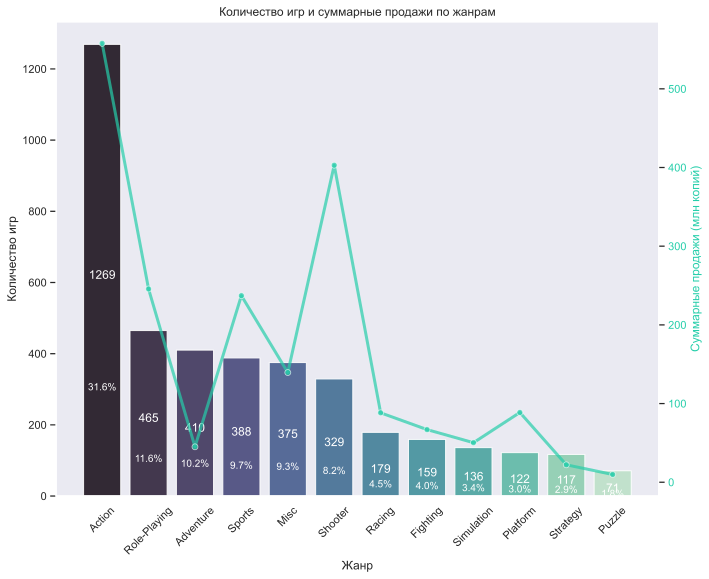

In [34]:
# сгруппируем по жанрам, посчитаем количество игр и суммарные продажи
games_act_count = (games_act
                   .pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum'])
                   .reset_index())
games_act_count.columns = ['genre', 'count', 'sum']
games_act_count = games_act_count.sort_values(by='count', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 8))

# построим график распределения игр по жанрам
ax1 = sns.countplot(data=games_act,
                    x='genre',
                    order=games_act['genre'].value_counts().index,
                    palette='mako',
                    alpha=0.9) 
ax1.set_ylabel('Количество игр')  # Подпись для левой оси Y
ax1.tick_params(axis='y')

# добавляем количество значений внутри столбца с количеством
nums(games_act, ax1, percentage=True)

plt.xticks(rotation=45)
# добавляем вторую ось
ax2 = ax1.twinx()

# построим график суммарных продаж
ax2 = sns.lineplot(data=games_act_count,
             x='genre',
             y='sum',
             color='#26ceaa',
             alpha=0.7,
             marker='o',
             linewidth=3)
ax2.set_ylabel('Суммарные продажи (млн копий)', color='#26ceaa')  # Подпись для правой оси Y
ax2.tick_params(axis='y', labelcolor='#26ceaa')  # Цвет подписей для правой оси Y

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()

# Добавление заголовка и подписей
ax1.set_xlabel('Жанр')
show_title(title='Количество игр и суммарные продажи по жанрам',
          x_label='',
          y_label='')

- ***Топ 5 жанров по продажам и количеству игр: action, sports, misc, role-playing, shooter.***
- ***Так же можно выделить жанры с наименьшим количеством продаж: simulation, strategy, puzzle.***

- **Изучим распределение дохода игр по жанрам по медианным продажам.**
- **Построим boxplot.**

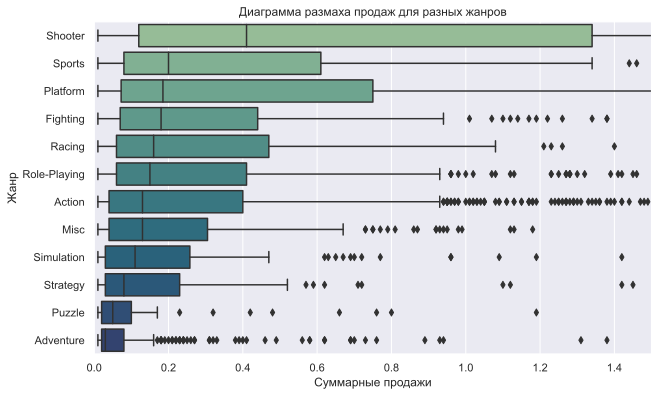

In [35]:
# сортировка от большего к меньшему
order = games_act.groupby('genre')['all_sales'].median().sort_values(ascending=False).index

# строим график
ax = sns.boxplot(data=games_act,
                 x='all_sales',
                 y='genre',
                 order=order,
                 width=.8,
                 palette="crest",
                 dodge=False)

plt.xlim(0, 1.5)

#именуем таблицу и оси
show_title(title='Диаграмма размаха продаж для разных жанров',
           x_label='all_sales',
           y_label='genre',
           file_name='1_3_7')

***По диаграмме размаха можно отпределить жанр со стабильным высоким доходом - shooter. Топ-5: shooter, sports, platform, fighting, racing.***

<a id="portrait"></a>
## Портрет пользователя

#### Определение функций для построения графиков

- **Определим функцию, которая составляет сводную таблицу с суммарными продажами по регионам.**

In [36]:
# определим функцию, которая составляет сводную таблицу с суммарными продажами по регионам
def top_5(df, column, top=5):
    '''
    Функция возвращает сводную таблицу по регионам
    '''
    df_top = (df
                .pivot_table(index=column, values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                .stack()
                .reset_index())
    df_top.columns = [column, 'region', 'sum_sales']
    
    # определяем топ-5 для каждого региона
    df_top = (df_top
                    .groupby('region')  
                    .apply(lambda x: x.nlargest(top, 'sum_sales'))
                    .reset_index(drop=True))
    
    # добавим столбец с процентом от общего количества продаж
    # объединим таблицы
    df_top = (df_top
                    .merge(df.pivot_table(index=column, values='all_sales', aggfunc='sum').reset_index(),
                                  on=column))
    # добавим новый столбец
    df_top['percent'] = ((df_top["sum_sales"] / 
                                    df_top["all_sales"] * 100)
                                    .round(1))
    
    return df_top.sort_values(by='sum_sales', ascending=False)    

- **Определим функцию для построения графиков в зависимости от региона.**

In [37]:
# определим функцию для построения графиков в зависимости от региона
def top_5_graph(df, column, y_left, y_right, title, figsize=(13, 6), rot=False, file_name=None):
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    # построим график распределения продаж по платформам в зависимости от региона
    regions = ['na_sales', 'eu_sales', 'jp_sales'] # регионы
    region_names = ['Северная Америка', 'Европа', 'Япония'] # названия регионов
    
    for i, (region, region_name) in enumerate(zip(regions, region_names)):
        # строим bar plot с количеством проданных копий по платформам для каждого региона
        sns.barplot(data=df.query('region == @region'),
                         x=column,
                         y='sum_sales',
                         palette='mako',
                         ax=axes[i])
        
        axes[i].set_xlabel(region_name)
        axes[i].set_ylabel('')

        # поворот названий осей
        if rot:
            axes[i].tick_params(axis='x', rotation=45)
        
        # добавляем сумму продаж
        nums(df.query('region == @region'), axes[i])  
    
        # добавляем вторую ось
        ax2 = axes[i].twinx()
        
        # строим line plot с долей общемировых продаж
        sns.lineplot(data=df.query('region == @region'),
                    x=column,
                    y='percent',
                    color='#26ceaa',
                    alpha=0.5,
                    marker='o',
                    linewidth=3,
                    ax=ax2)
        ax2.set_ylabel('')
        ax2.tick_params(axis='y', labelcolor='#26ceaa')  # Цвет подписей для правой оси Y
        
        # убираем сетку
        axes[i].grid(False)
        ax2.grid(False)

       
    
    # подписи осей и графиков
    axes[0].set_ylabel(y_left)
    
    ax2.set_ylabel(y_right, color='#26ceaa')  # Подпись для правой оси Y
    
    fig.suptitle(title)
    
    plt.tight_layout()

    if file_name:
        plt.savefig(file_name)
    plt.show()

### Самые популярные платформы

- **Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).**

In [38]:
games_top_platform = top_5(games_act, 'platform')
games_top_platform

,platform,region,sum_sales,all_sales,percent
7,X360,na_sales,226.80,380.38,59.6
2,PS3,na_sales,168.26,445.56,37.8
0,PS3,eu_sales,163.09,445.56,36.6
3,PS4,eu_sales,141.09,314.14,44.9
6,X360,eu_sales,117.10,380.38,30.8
5,PS4,na_sales,108.74,314.14,34.6
9,3DS,jp_sales,100.62,257.81,39.0
14,XOne,na_sales,93.12,159.32,58.4
10,3DS,na_sales,82.65,257.81,32.1
8,3DS,eu_sales,61.27,257.81,23.8


- **Построим график распределения продаж в зависимости от региона.**

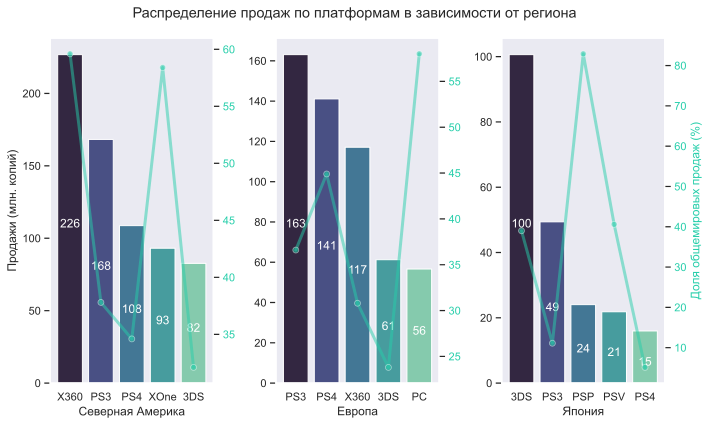

In [39]:
top_5_graph(df=games_top_platform,
            column='platform',
            y_left='Продажи (млн. копий)',
            y_right='Доля общемировых продаж (%)',
            title='Распределение продаж по платформам в зависимости от региона',
            figsize=(10, 6),
            file_name='1_4_1')

- ***Для каждого региона явно выделены лидеры по количеству проданных копий: для Северной Америки - Х360, для Европы - PS3, для Японии - 3DS.***
- ***Так же для каждого региона выделяются платформы с относительной долей продаж более 40% от общемировых. Для Северной Америки - это X360 и PS4, для Европы - PS4 и РС, для Японии - 3DS и PSP.*** 

### Самые популярные жанры

- **Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).**

In [40]:
games_top_genre = top_5(games_act, 'genre')
games_top_genre.head()

,genre,region,sum_sales,all_sales,percent
2,Action,na_sales,230.92,557.80,41.4
0,Action,eu_sales,199.12,557.80,35.7
4,Shooter,na_sales,194.43,402.91,48.3
3,Shooter,eu_sales,148.02,402.91,36.7
6,Sports,na_sales,108.70,237.14,45.8


- **Построим график распределения продаж в зависимости от региона.**

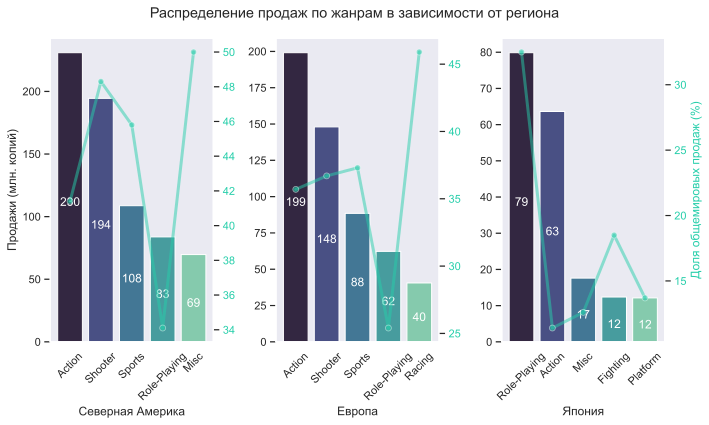

In [41]:
top_5_graph(df=games_top_genre,
            column='genre',
            y_left='Продажи (млн. копий)',
            y_right='Доля общемировых продаж (%)',
            title='Распределение продаж по жанрам в зависимости от региона',
            figsize=(10, 6),
            rot=True,
            file_name='1_4_2')

- ***Топ 4 игровых жанра в северной америке и Европе совпадают.***
- ***В японском регионе пользователи предпочитают Role-Playing. Action на втором месте по популярности. Но доля от общемировых продаж менее 10%.***

### Влияние рейтинга ESRB

- **Определим, влияет ли рейтинг ESRB на продажи в регионах.**

In [42]:
games_act['rating'] = games_act['rating'].astype('object')

In [43]:
games_top_rating = top_5(games_act, 'rating', top=7)
games_top_rating.head()

,rating,region,sum_sales,all_sales,percent
2,M,na_sales,308.45,666.81,46.3
0,M,eu_sales,250.26,666.81,37.5
5,E,na_sales,170.17,389.43,43.7
3,E,eu_sales,141.72,389.43,36.4
11,E10+,na_sales,117.72,230.86,51.0


- **Построим график распределения продаж в зависимости от региона.**

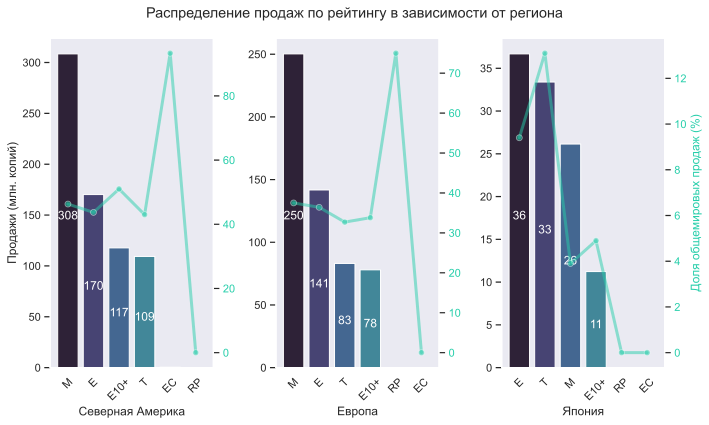

In [44]:
top_5_graph(df=games_top_rating,
            column='rating',
            y_left='Продажи (млн. копий)',
            y_right='Доля общемировых продаж (%)',
            title='Распределение продаж по рейтингу в зависимости от региона',
            figsize=(10, 6),
            rot=True,
            file_name='1_4_3')

- ***Пользователи из Северной Америки и из Европы предпочитают игры с рейтингом М и Е. В Японии рейтинг Е на первом месте по популярности.***
- ***Можно сказать, что рейтинг оказывает определенное влияние на выбор пользователей.***

### Портрет пользователя из Северной Америки:

- ***Предпочтительные платформы: Х360, PS3, PS4. (Консольные платформы)***
- ***Предпочтительные жанры: Action, Shooter, Sports.***

### Портрет пользователя из Европы:

- ***Предпочтительные платформы: PS3, PS4б Х360. (Консольные платформы)***
- ***Предпочтительные жанры: Action, Shooter, Sports.***

### Портрет пользователя из Японии:

- ***Предпочтительные платформы: 3DS, PS3, PSP. (Портативные платформы 3DS, PSP)***
- ***Предпочтительные жанры: Role-Playing, Action, Misc.***

<a id="hypothesis"></a>
## Проверка гипотез

- **Зададим уровень статистической значимости alpha = 0.05**

In [45]:
alpha = 0.05

- **Определим функцию для вывода результата проверки гипотезы.**

In [46]:
def h_print(x, y, result):
    
    print(f'Среднее x: {x:.2f}') # печатаем среднее значение для первой выборки
    print(f'Среднее y: {y:.2f}') # печатаем среднее значение для второй выборки
    print(f'p-value: {result}') # печатаем p-value
    # сравниваем p-value с alpha
    if result < alpha:
        print('Отвергаем Н0')
    else:
        print('Не получилось отвергнуть Н0')  

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

- **За Н0 примем - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **За Н1 примем - средние пользовательские рейтинги платформ Xbox One и PC не равны.**

**В данном случае проверяем двустороннюю гипотезу.**

**Проводим двухвыборочный t-тест для независимых выборок.**

In [47]:
results = st.ttest_ind(games_act.query('platform == "XOne"')['user_score'].dropna(),
                       games_act.query('platform == "PC"')['user_score'].dropna())

h_print(x=games_act.query('platform == "XOne"')['user_score'].mean(),
        y=games_act.query('platform == "PC"')['user_score'].mean(),
        result=results.pvalue)

Среднее x: 6.52
Среднее y: 6.45
p-value: 0.5939403711513196
Не получилось отвергнуть Н0


***Недостаточно данных, чтобы отвергнуть Н0. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

### Средние пользовательские рейтинги жанров Action и Sports разные?

- **За Н0 примем - средние пользовательские рейтинги жанров Action и Sports одинаковые.**
- **За Н1 примем - средние пользовательские рейтинги жанров Action и Sports не равны.**

**В данном случае проверяем двустороннюю гипотезу.**

**Проводим двухвыборочный t-тест для независимых выборок.**

In [48]:
results = st.ttest_ind(games_act.query('genre == "Action"')['user_score'].dropna(),
                       games_act.query('genre == "Sports"')['user_score'].dropna())

h_print(x=games_act.query('genre == "Action"')['user_score'].mean(),
        y=games_act.query('genre == "Sports"')['user_score'].mean(),
        result=results.pvalue)

Среднее x: 6.78
Среднее y: 5.65
p-value: 6.700647490667088e-24
Отвергаем Н0


***Отвергаем Н0. Средние пользовательские рейтинги жанров Action и Sports не равны.***

<a id="conclusions"></a>
## Выводы:
### [Исследовательский анализ продаж игр:](#EDA)

- **Определено количество игр, выпускавшихся в разные годы.**
<img src="1_3_1.png" width="800" align="center">

- **Определено распределение платформ с наибольшими суммарными продажами по годам.**
<img src="1_3_2.png" width="800" align="center">
    
    ***На графике распределения видно, что срок жизни платформы составляет примерно 7 - 12 лет.***
    

- **Определено, что следующее поколение платформы появляется примерно через 5 - 6 лет после выхода предыдущего.**

- **Определен актуальный период наблюдений - с 2011 по 2016 годы.**

- **Определены потенциально прибыльные платформы:**
<img src="1_3_4.png" width="800" align="center">
    
    ***Восходящий тренд наблюдается у платформ PSV и 3DS.***

    ***Платформы XOne и PS4 достаточно молодые (появились в 2013 году). Потенциально их продажи могут вырасти.***
    

- **Исследованы глобальные продажи игр в разбивке по платформам.**
<img src="1_3_5.png" width="800" align="center">
    
    ***Основные продажи для всех платформ расположены до 0.75 млн. проданных копий игр.***
    

- **Между отзывами критиков и всеми продажами корреляция крайне слабая (0.39). Между отзывами пользователей и всеми продажами корреляция отсутствует (0.039).**

- **В целом, можно заключить, оценка критиков оказывает слабое влияние на общие продажи.**

- **Изучено общее распределение игр по жанрам.**
<img src="1_3_7.png" width="800" align="center">

    ***По диаграмме размаха можно отпределить жанр со стабильным высоким доходом - shooter. Топ-5: shooter, sports, platform, fighting, racing.***


### [Портрет пользователя каждого региона:](#portrait)
- **Самые популярные платформы (топ-5)**
<img src="1_4_1.png" width="800" align="center">

    ***Для каждого региона явно выделены лидеры по количеству проданных копий: для Северной Америки - Х360, для Европы - PS3, для Японии - 3DS.***

- **Самые популярные жанры (топ-5).**
<img src="1_4_2.png" width="800" align="center">

    ***Топ 4 игровых жанра в северной америке и Европе совпадают.***

- **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**
<img src="1_4_3.png" width="800" align="center">
    
    ***Пользователи из Северной Америки и из Европы предпочитают игры с рейтингом М и Е. В Японии рейтинг Е на первом месте по популярности.***

- **Портреты пользователей каждого региона:**

    - **Портрет пользователя из Северной Америки:**
        - ***Предпочтительные платформы: Х360, PS3, PS4. (Консольные платформы)***
        - ***Предпочтительные жанры: Action, Shooter, Sports.***
 
    - **Портрет пользователя из Европы:**
        - ***Предпочтительные платформы: PS3, PS4б Х360. (Консольные платформы)***
        - ***Предпочтительные жанры: Action, Shooter, Sports.***

    - **Портрет пользователя из Японии:**
        - ***Предпочтительные платформы: 3DS, PS3, PSP. (Портативные платформы 3DS, PSP)***
        - ***Предпочтительные жанры: Role-Playing, Action, Misc.***


### [Гипотезы:](#hypothesis)
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **Средние пользовательские рейтинги жанров Action и Sports не равны.**

### Рекомендации:

1. **Учет актуальности платформ: PS4, XOne, 3DS, PSV.**

2. **Ставка на игры в популярных жанрах: Shooter, Action, Sports для Северной Америки и Европы; Role-Playing и Action для Японии.**

3. **Региональные предпочтения: адаптация контента под предпочтения пользователей в каждом регионе.**

4. **Учет рейтинга ESRB: рейтинг M для Северной Америки и Европы, рейтинг E для Японии.**